In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn import neighbors

/home/administrador/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Creacion de los centroides
azul_centroides=[]
naranja_centroides=[]
for j in range(10):
    azul_centroides.append(np.random.multivariate_normal([1,0],[[1,0],[0,1]]))
    naranja_centroides.append(np.random.multivariate_normal([0,1],[[1,0],[0,1]]))

In [3]:
#Creacion de los puntos
xa=[]
ya=[]
xn=[]
yn=[]
z=[]
puntos=[]
for i in range(100):
    b=np.random.randint(9,size=1)
    n=np.random.randint(9,size=1)
    punto_azul=np.random.multivariate_normal(azul_centroides[b],[[0.2,0],[0,0.2]])
    puntos.append([punto_azul[1],punto_azul[0]])
    punto_naranja=np.random.multivariate_normal(naranja_centroides[n],[[0.2,0],[0,0.2]])
    puntos.append([punto_naranja[1],punto_naranja[0]])
    xa.append(punto_azul[0])
    ya.append(punto_azul[1])
    z.append(0)
    xn.append(punto_naranja[0])
    yn.append(punto_naranja[1])
    z.append(1)
azul='#0000ff'
naranja='#ff8000'
a_fondo='#66b2ff'
n_fondo='#ffb266'
minimox_naranja=min(xn)
minimoy_naranja=min(yn)
minimox_azul=min(xa)
minimoy_azul=min(ya)
maximox_naranja=max(xn)
maximoy_naranja=max(yn)
maximox_azul=max(xa)
maximoy_azul=max(ya)
minimox=min([minimox_naranja,minimox_azul])
minimoy=min([minimoy_naranja,minimoy_azul])
maximox=max([maximox_naranja,maximox_azul])
maximoy=max([maximoy_naranja,maximoy_azul])

/home/administrador/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/administrador/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


/home/administrador/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


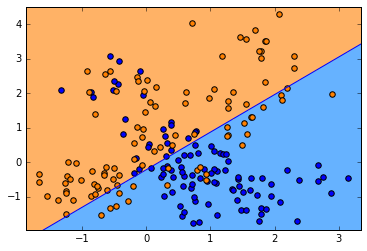

In [4]:
#Regresion lineal de los puntos
clf=linear_model.LinearRegression()
clf.fit(puntos,z)
corte=-(clf.intercept_-0.5)/clf.coef_[0]
pendiente=-clf.coef_[1]/clf.coef_[0]
x=np.linspace(-10,10,100)
y=pendiente*x+corte
f=plt.figure(1)


cmap_light = ListedColormap([a_fondo, n_fondo])
cmap_light1 = ListedColormap([naranja,azul])
cmap_bold = ListedColormap([azul, naranja])
xx, yy = np.meshgrid(np.arange(-6, 6, 0.024),np.arange(-6, 6, 0.024))

grid_x=np.linspace(-6,6,500)
grid_y=np.linspace(-6,6,500)
zp=np.zeros((500,500))
i=0
for k in grid_x:
    j=0
    for h in grid_y:
        yap=pendiente*k+corte
        if h>yap:
            zp[j,i]=1
        j+=1
    i+=1
zp = zp.reshape(xx.shape)
plt.pcolormesh(xx,yy, zp, cmap=cmap_light)
plt.plot(x,y)
plt.scatter(xa,ya,s=30,c=azul)
plt.scatter(xn,yn,s=30,c=naranja)
plt.ylim([minimoy-0.2,maximoy+0.2])
plt.xlim([minimox-0.2,maximox+0.2])
f.show()

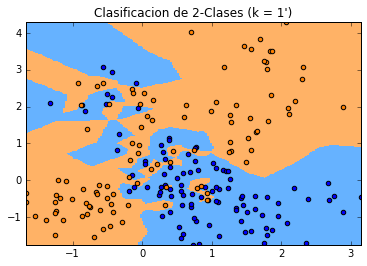

In [5]:
#Clasificacion con 1-Vecinos cercanos
n_neighbors=1
h = .1  

clf1 = neighbors.KNeighborsClassifier(n_neighbors)
clf1.fit(puntos, z)

ev=[]
grid_x1=np.linspace(-6,6,500)
grid_y1=np.linspace(-6,6,500)
for k in grid_x1:
    for h in grid_y1:
        ev.append([k,h])
Z1 = clf1.predict(ev)

Z1 = Z1.reshape(xx.shape)
g=plt.figure(2)
plt.pcolormesh(xx,yy, Z1, cmap=cmap_light)

plt.scatter(xa, ya, c=azul)
plt.scatter(xn, yn, c=naranja)
plt.xlim(minimox, maximox)
plt.ylim(minimoy, maximoy)
plt.title("Clasificacion de 2-Clases (k = %i')"% (n_neighbors))

g.show()

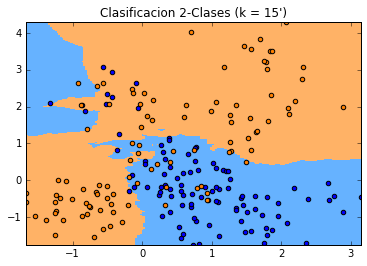

In [6]:
#Clasificacion de 15-Vecinos cercanos
n_neighbors1=15
h1 = .1  

clf2 = neighbors.KNeighborsClassifier(n_neighbors1)
clf2.fit(puntos, z)

Z2 = clf2.predict(ev)

Z2 = Z2.reshape(xx.shape)
s=plt.figure(3)
plt.pcolormesh(xx,yy, Z2, cmap=cmap_light)

plt.scatter(xa, ya, c=azul)
plt.scatter(xn, yn, c=naranja)
plt.xlim(minimox, maximox)
plt.ylim(minimoy, maximoy)
plt.title("Clasificacion 2-Clases (k = %i')"% (n_neighbors1))

s.show()

/home/administrador/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/administrador/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/administrador/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/administrador/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


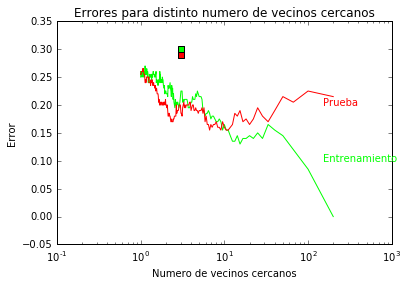

In [11]:
#Evaluacion del error para distintos vecinos cercanos, los puntos cuadrados son los errores de las regresiones lineales tanto para los datos de entrenamiento como para los de prueba 
puntos_ent=[]
z_ent=[]
puntos_test=[]
z_test=[]
for i in range(200):
    b=np.random.randint(9,size=1)
    n=np.random.randint(9,size=1)
    punto_azul=np.random.multivariate_normal(azul_centroides[b],[[0.2,0],[0,0.2]])
    puntos_ent.append([punto_azul[1],punto_azul[0]])
    z_ent.append(0)
    punto_naranja=np.random.multivariate_normal(naranja_centroides[n],[[0.2,0],[0,0.2]])
    puntos_ent.append([punto_naranja[1],punto_naranja[0]])
    z_ent.append(1)
for i in range(200):
    b=np.random.randint(9,size=1)
    n=np.random.randint(9,size=1)
    punto_azul=np.random.multivariate_normal(azul_centroides[b],[[0.2,0],[0,0.2]])
    puntos_test.append([punto_azul[1],punto_azul[0]])
    z_test.append(0)
    punto_naranja=np.random.multivariate_normal(naranja_centroides[n],[[0.2,0],[0,0.2]])
    puntos_test.append([punto_naranja[1],punto_naranja[0]])    
    z_test.append(1)
error_ent=[]
error_test=[]
xs=[]
cf=[]

for i in range(200):
    cf.append(neighbors.KNeighborsClassifier(n_neighbors=i+1))
    
for i in range(200):
    xs.append(float(200)/(i+1))
    cf[i].fit(puntos_ent, z_ent)
    errort=0
    errore=0
    pr_ent=cf[i].predict(puntos_ent)
    pr_test=cf[i].predict(puntos_test)
    for j in range(200):
        if pr_ent[j]!=z_ent[j]:
            errore+=1
        if pr_test[j]!=z_test[j]:
            errort+=1
    error_ent.append(float(errore)/200)
    error_test.append(float(errort)/200)     
clf3=linear_model.LinearRegression()
clf3.fit(puntos_ent,z_ent)
pr_entl=clf3.predict(puntos_ent)
pr_testl=clf3.predict(puntos_test)
errorel=0
errortl=0

for j in range(200):
    pr_entl1=0
    pr_testl1=0
    if pr_entl[j]>0.5:
        pr_entl1=1
    if pr_testl[j]>0.5:
        pr_testl1=1
    if pr_entl1!=z_ent[j]:
        errorel+=1
    if pr_testl1!=z_test[j]:
        errortl+=1
errorel=float(errorel)/200
errortl=float(errortl)/200

xs1=[]
error_ent1=[]
error_test1=[]
for i in range(200):
    xs1.append(xs[199-i])
    error_ent1.append(error_ent[199-i])
    error_test1.append(error_test[199-i])



m=plt.figure(4)
plt.plot(xs,error_ent,c='#00FF00')
plt.plot(xs,error_test,c='#FF0000')
plt.scatter(3,errorel,s=40,c='#00FF00',marker='s')
plt.scatter(3,errortl,s=40,c='#FF0000',marker='s')
plt.xscale('log')
plt.title('Errores para distinto numero de vecinos cercanos')
plt.ylabel('Error')
plt.xlabel('Numero de vecinos cercanos')
plt.text(150,0.10,'Entrenamiento',color='#00FF00')
plt.text(150,0.20,'Prueba',color='#FF0000')
m.show()